In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The coe in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

google Doc: https://drive.google.com/open?id=16G5cP8Q0-UDzpj_bsLY2a3qYetB-S7CZ

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/My\ Drive/hw2/train

ls: cannot access '/content/gdrive/My Drive/hw2/train': No such file or directory


In [0]:
!ffmpeg -i /content/gdrive/My\ Drive/hw2/IMG_0004.MOV -r 5 /content/gdrive/My\ Drive/hw2/train/landMark3/Univqq%03d.jpg

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!cd /content/gdrive/My\ Drive/

In [0]:
!pwd




/content


In [0]:
base_dir = '/content/gdrive/My Drive/hw2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_landM1_dir = os.path.join(train_dir, 'landMark1')
train_landM2_dir = os.path.join(train_dir, 'landMark2')
train_landM3_dir = os.path.join(train_dir, 'landMark3')

validation_landM1_dir = os.path.join(validation_dir, 'landMark1')
validation_landM2_dir = os.path.join(validation_dir, 'landMark2')
validation_landM3_dir = os.path.join(validation_dir, 'landMark3')

test_landM1_dir = os.path.join(test_dir, 'landMark1')
test_landM2_dir = os.path.join(test_dir, 'landMark2')
test_landM3_dir = os.path.join(test_dir, 'landMark3')


In [0]:
num_landM1_tr = len(os.listdir(train_landM1_dir))
num_landM2_tr = len(os.listdir(train_landM2_dir))
num_landM3_tr = len(os.listdir(train_landM3_dir))

num_landM1_val = len(os.listdir(validation_landM1_dir))
num_landM2_val = len(os.listdir(validation_landM2_dir))
num_landM3_val = len(os.listdir(validation_landM3_dir))

num_landM1_ts = len(os.listdir(test_landM1_dir))
num_landM2_ts = len(os.listdir(test_landM2_dir))
num_landM3_ts = len(os.listdir(test_landM3_dir))

total_train = num_landM1_tr + num_landM2_tr + num_landM3_tr
total_val = num_landM1_val + num_landM2_val + num_landM3_val
total_ts = num_landM1_ts + num_landM2_ts + num_landM3_ts

In [0]:
print('Training landMark1 images:', num_landM1_tr)
print('Training landMark2 images:', num_landM2_tr)
print('Training landMark3 images:', num_landM3_tr)

print('Validation landMark1 images:', num_landM1_val)
print('Validation landMark2 images:', num_landM2_val)
print('Validation landMark3 images:', num_landM3_val)

print('test landMark1 images:', num_landM1_ts)
print('test landMark2 images:', num_landM2_ts)
print('test landMark3 images:', num_landM3_ts)

print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_ts)

Training landMark1 images: 100
Training landMark2 images: 101
Training landMark3 images: 97
Validation landMark1 images: 51
Validation landMark2 images: 51
Validation landMark3 images: 48
test landMark1 images: 25
test landMark2 images: 27
test landMark3 images: 26
--
Total training images: 298
Total validation images: 150
Total test images: 78


In [0]:
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


In [0]:
conv_base.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(TARGET_SHAPE, TARGET_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
      
        features_batch = conv_base.predict(inputs_batch)
        # print(features_batch.shape)
        # (32, 4, 4, 512)
        # Think: batch_size, rows, cols, channels
        
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = labels_batch
        i += 1
        if i * BATCH_SIZE >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 298)
validation_features, validation_labels = extract_features(validation_dir, 150)
test_features, test_labels = extract_features(test_dir, 78)

Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [0]:
FLATTENED_SHAPE = 4 * 4 * 512

train_features = np.reshape(train_features, (total_train, FLATTENED_SHAPE))
validation_features = np.reshape(validation_features, (total_val, FLATTENED_SHAPE))
test_features = np.reshape(test_features, (total_ts, FLATTENED_SHAPE))


In [0]:
EPOCHS = 50

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=FLATTENED_SHAPE))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(validation_features, validation_labels))
score = model.evaluate(test_features, test_labels,verbose =2 )
print("Acc is", score[1])

Train on 298 samples, validate on 150 samples
Epoch 1/50
298/298 [==============================] - 1s 3ms/sample - loss: 0.9130 - acc: 0.6711 - val_loss: 0.1507 - val_acc: 0.9333
Epoch 2/50
298/298 [==============================] - 1s 2ms/sample - loss: 0.1829 - acc: 0.9564 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 3/50
298/298 [==============================] - 1s 2ms/sample - loss: 0.0434 - acc: 0.9832 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 4/50
298/298 [==============================] - 1s 2ms/sample - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 5/50
298/298 [==============================] - 1s 2ms/sample - loss: 0.0119 - acc: 0.9933 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 6/50
298/298 [==============================] - 1s 2ms/sample - loss: 0.0161 - acc: 0.9966 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 7/50
298/298 [==============================] - 1s 2ms/sample - loss: 0.0131 - acc: 0.9933 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 8/50
298/2

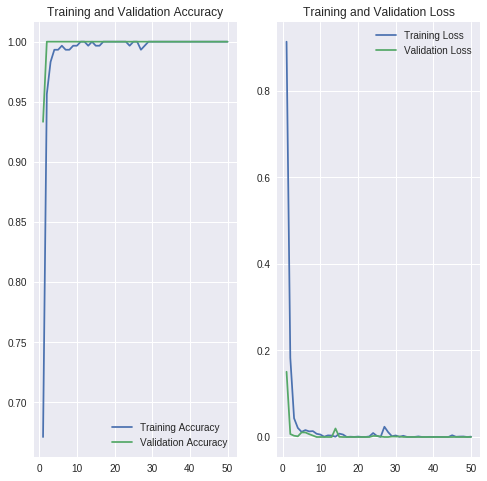

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



New pretrian models

In [0]:
conv_base = VGG19(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


In [0]:
conv_base.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(TARGET_SHAPE, TARGET_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
      
        features_batch = conv_base.predict(inputs_batch)
        # print(features_batch.shape)
        # (32, 4, 4, 512)
        # Think: batch_size, rows, cols, channels
        
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = labels_batch
        i += 1
        if i * BATCH_SIZE >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 298)
validation_features, validation_labels = extract_features(validation_dir, 150)
test_features, test_labels = extract_features(test_dir, 78)

Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [0]:
FLATTENED_SHAPE = 4 * 4 * 512

train_features = np.reshape(train_features, (total_train, FLATTENED_SHAPE))
validation_features = np.reshape(validation_features, (total_val, FLATTENED_SHAPE))
test_features = np.reshape(test_features, (total_ts, FLATTENED_SHAPE))

In [0]:
EPOCHS = 50

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=FLATTENED_SHAPE))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(validation_features, validation_labels))

score = model.evaluate(test_features, test_labels,verbose =2 )
print("Acc is", score[1])

Train on 298 samples, validate on 150 samples
Epoch 1/50
298/298 [==============================] - 1s 3ms/sample - loss: 1.0671 - acc: 0.6309 - val_loss: 0.0279 - val_acc: 0.9933
Epoch 2/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.1777 - acc: 0.9396 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 3/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.0687 - acc: 0.9799 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 4/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.0264 - acc: 0.9933 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 5/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 5.4804e-04 - val_acc: 1.0000
Epoch 6/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 3.6668e-04 - val_acc: 1.0000
Epoch 7/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 5.7376e-04 - val_acc: 1.0000
Epoc

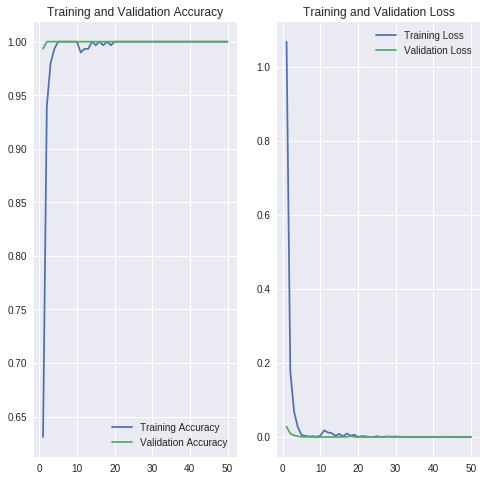

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Conclusion: 
1. i used two pretrian model, VGG16 use less paramter and it is smaller
2. since the photo set of landmark has samilar backgroud and same drakness .. so the accuracy is very high by using transfer learning 